In [16]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Data Prep/Data to Impute/final_data.csv')

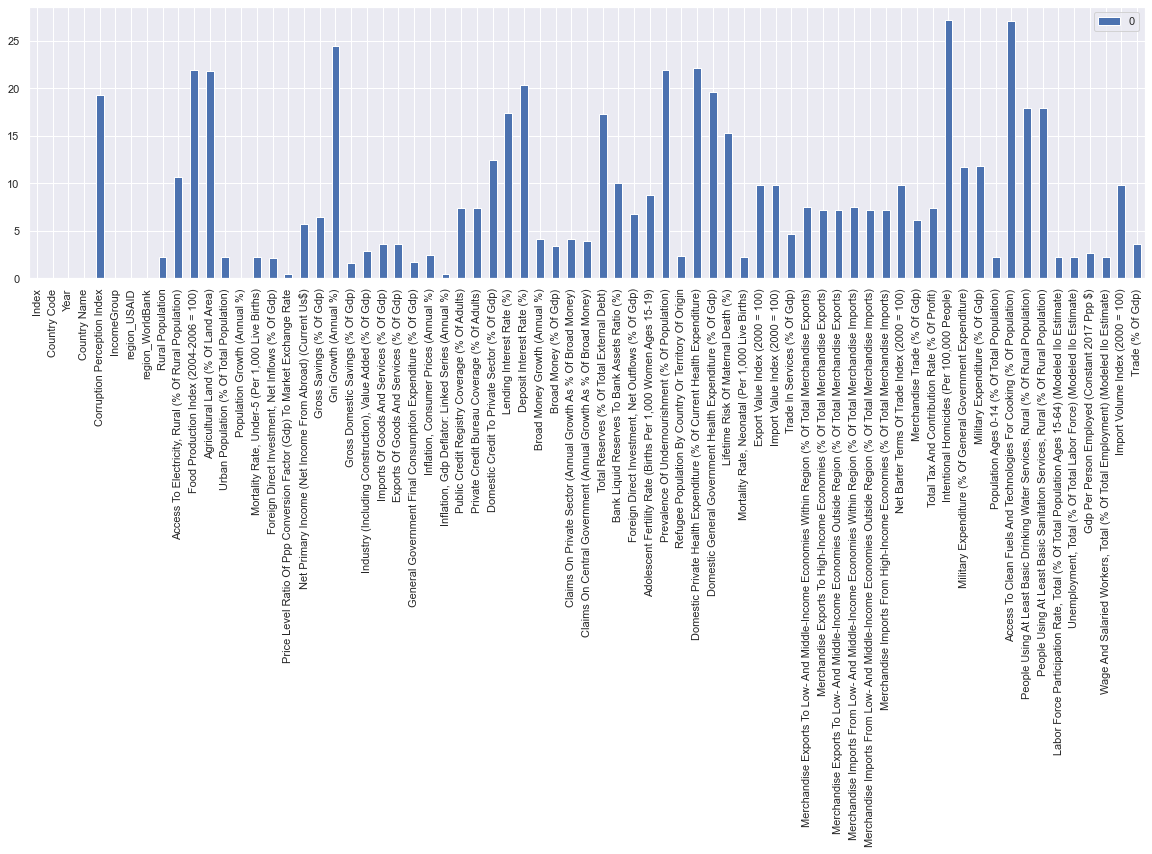

In [18]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

In [19]:
df.columns

Index(['Index', 'Country Code', 'Year', 'Country Name',
       'Corruption Perception Index', 'IncomeGroup', 'region_USAID',
       'region_WorldBank', 'Rural Population',
       'Access To Electricity, Rural (% Of Rural Population)',
       'Food Production Index (2004-2006 = 100)',
       'Agricultural Land (% Of Land Area)',
       'Urban Population (% Of Total Population)',
       'Population Growth (Annual %)',
       'Mortality Rate, Under-5 (Per 1,000 Live Births)',
       'Foreign Direct Investment, Net Inflows (% Of Gdp)',
       'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
       'Net Primary Income (Net Income From Abroad) (Current Us$)',
       'Gross Savings (% Of Gdp)', 'Gni Growth (Annual %)',
       'Gross Domestic Savings (% Of Gdp)',
       'Industry (Including Construction), Value Added (% Of Gdp)',
       'Imports Of Goods And Services (% Of Gdp)',
       'Exports Of Goods And Services (% Of Gdp)',
       'General Government Final Cons

In [20]:
#pd.DataFrame(df.isnull().sum()).to_csv('check.csv')

## Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate

In [21]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'], axis = 1)

0.9987176166617914


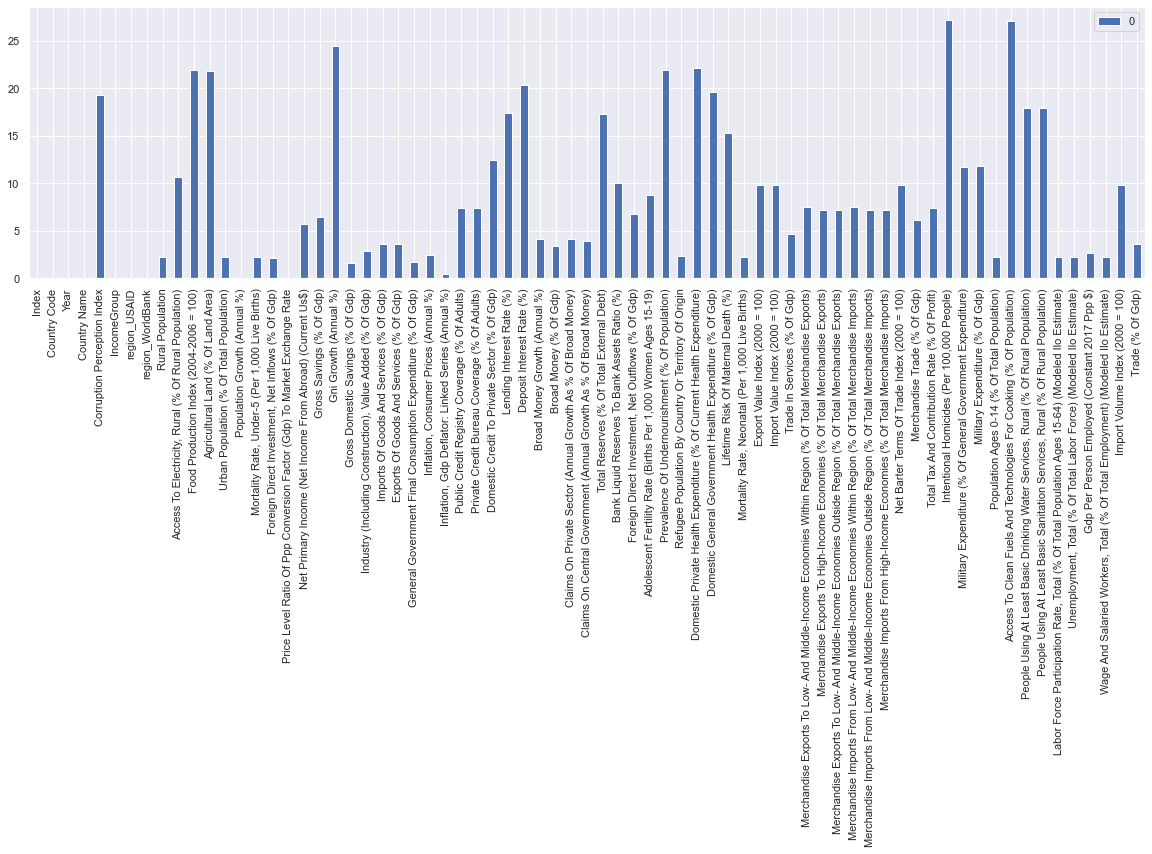

In [22]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].isnull(), 'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Inflation, Gdp Deflator: Linked Series (Annual %)

In [24]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Inflation, Gdp Deflator: Linked Series (Annual %)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Inflation, Gdp Deflator: Linked Series (Annual %)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Inflation, Gdp Deflator: Linked Series (Annual %)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Inflation, Gdp Deflator: Linked Series (Annual %)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Inflation, Gdp Deflator: Linked Series (Annual %)'], axis = 1)

0.987525259091785


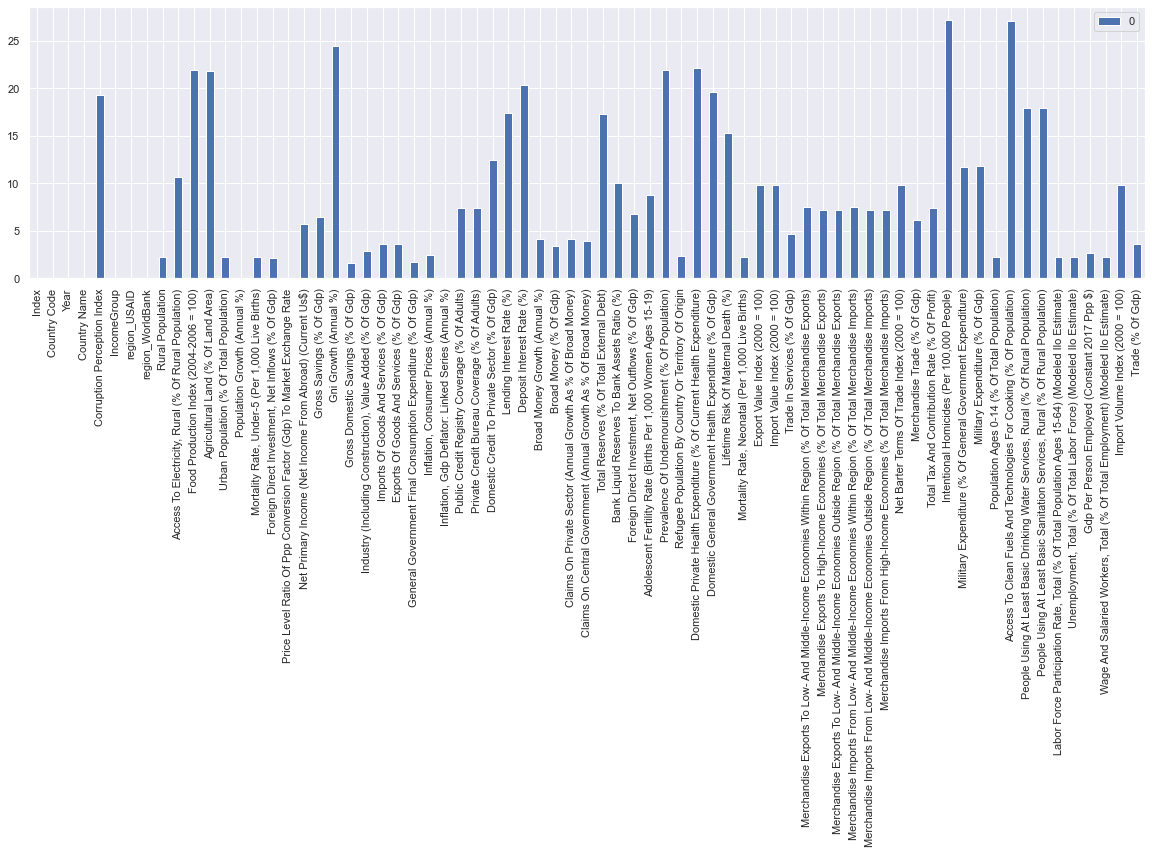

In [25]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Inflation, Gdp Deflator: Linked Series (Annual %)'].isnull(), 'Inflation, Gdp Deflator: Linked Series (Annual %)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Gross Domestic Savings (% Of Gdp)

In [27]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate','Gross Domestic Savings (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gross Domestic Savings (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)

0.9991705321725797


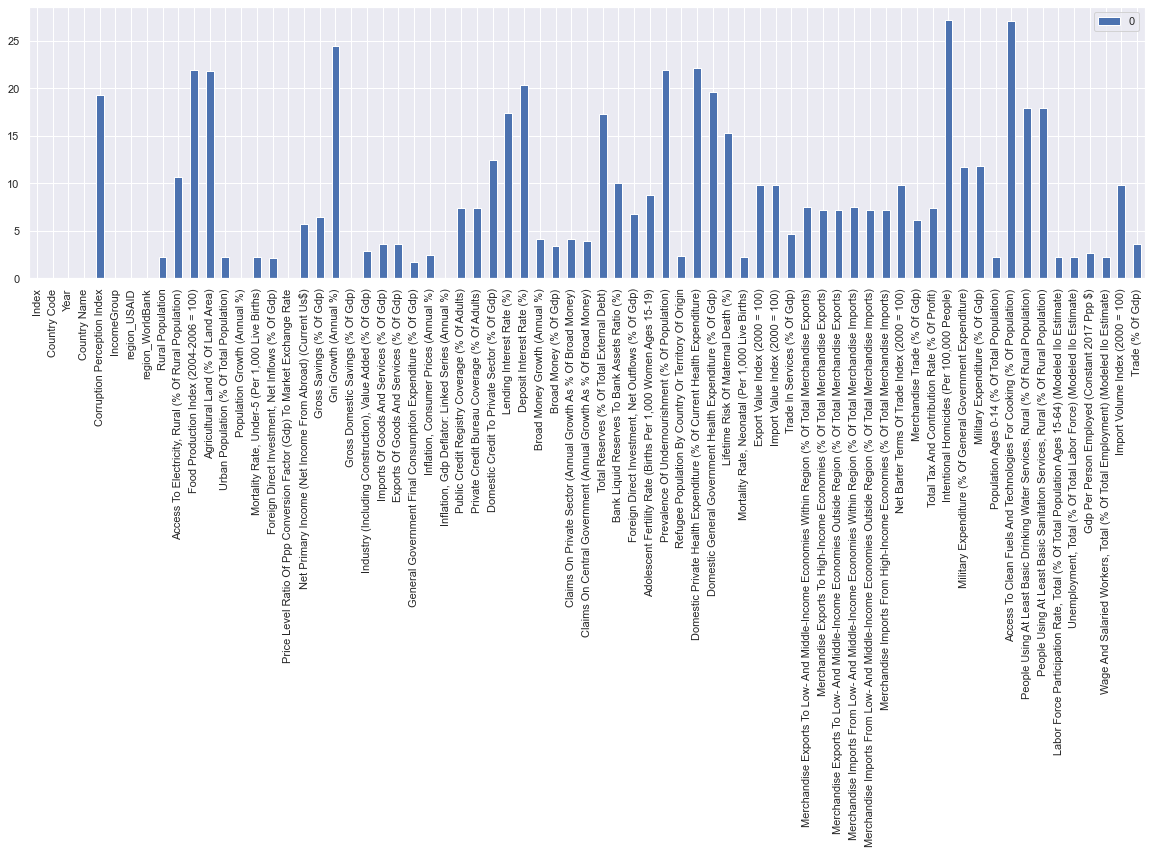

In [28]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Gross Domestic Savings (% Of Gdp)'].isnull(), 'Gross Domestic Savings (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## General Government Final Consumption Expenditure (% Of Gdp)

In [32]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate','Gross Domestic Savings (% Of Gdp)','General Government Final Consumption Expenditure (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['General Government Final Consumption Expenditure (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['General Government Final Consumption Expenditure (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['General Government Final Consumption Expenditure (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['General Government Final Consumption Expenditure (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['General Government Final Consumption Expenditure (% Of Gdp)'], axis = 1)

0.9984413889737825


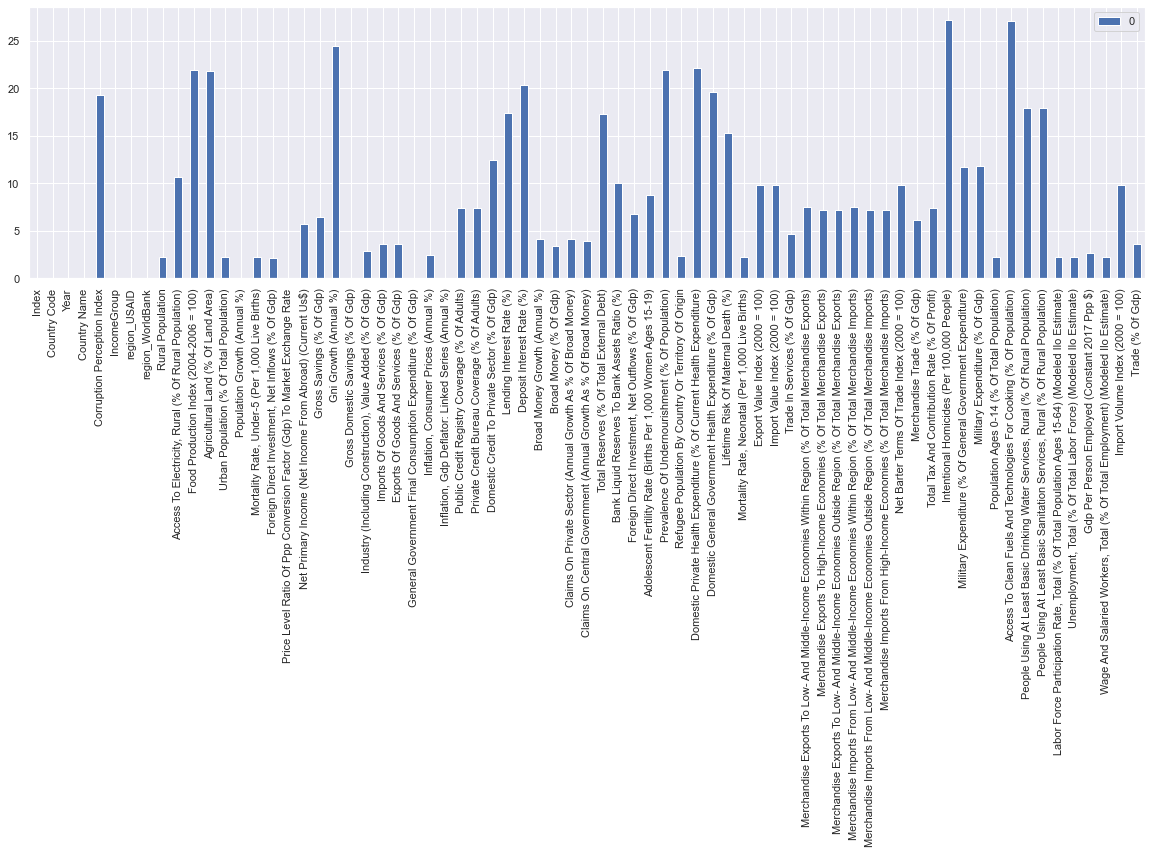

In [33]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['General Government Final Consumption Expenditure (% Of Gdp)'].isnull(), 'General Government Final Consumption Expenditure (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Foreign Direct Investment, Net Inflows (% Of Gdp)

In [34]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Foreign Direct Investment, Net Inflows (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Foreign Direct Investment, Net Inflows (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Foreign Direct Investment, Net Inflows (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Foreign Direct Investment, Net Inflows (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Foreign Direct Investment, Net Inflows (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Foreign Direct Investment, Net Inflows (% Of Gdp)'], axis = 1)

0.997029156016154


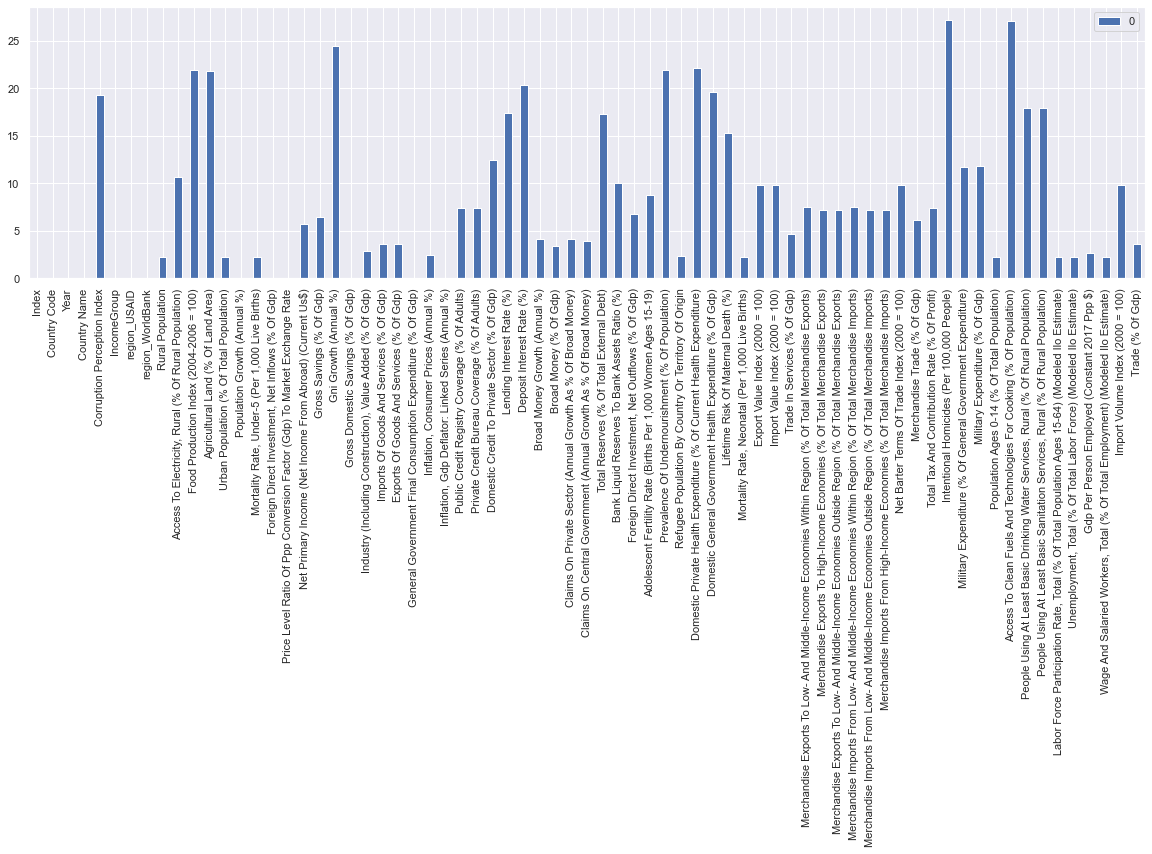

In [35]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Foreign Direct Investment, Net Inflows (% Of Gdp)'].isnull(), 'Foreign Direct Investment, Net Inflows (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Urban Population (% Of Total Population)

In [36]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Urban Population (% Of Total Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Urban Population (% Of Total Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Urban Population (% Of Total Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Urban Population (% Of Total Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Urban Population (% Of Total Population)'], axis = 1)

0.9998267436936484


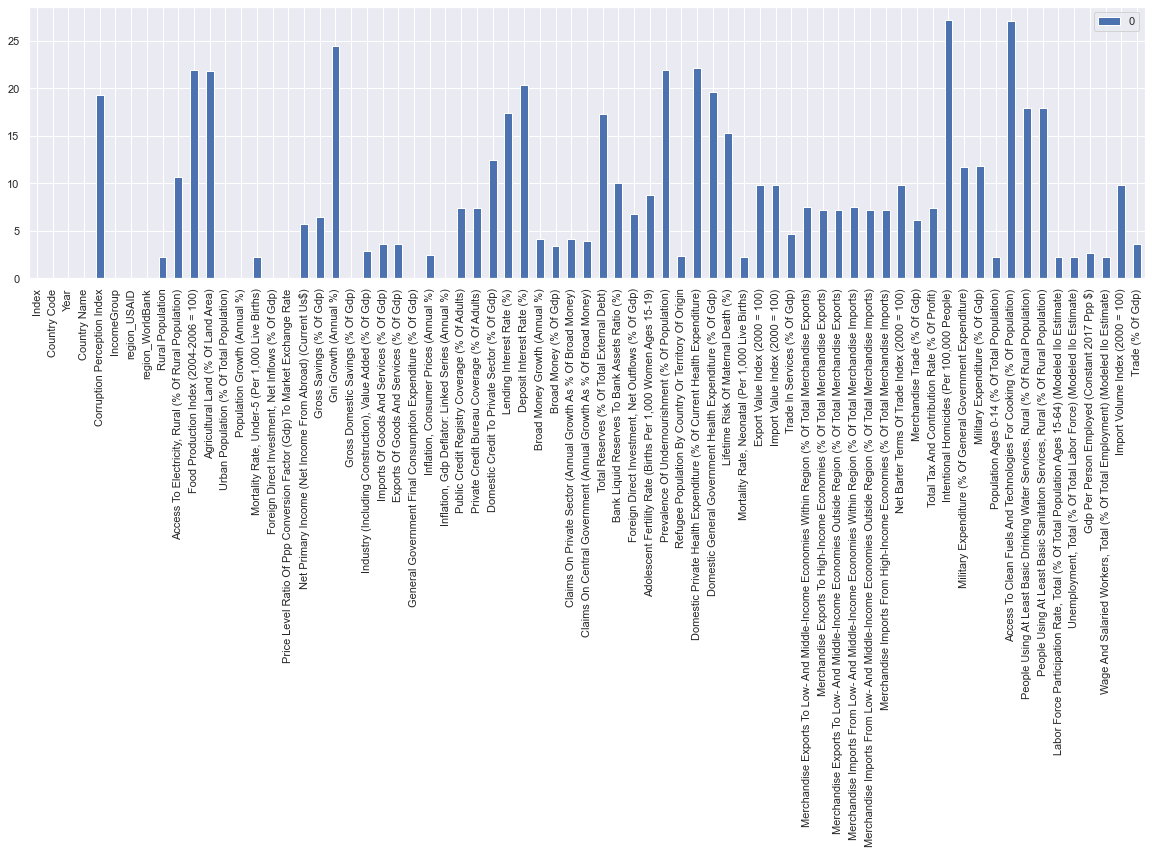

In [37]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Urban Population (% Of Total Population)'].isnull(), 'Urban Population (% Of Total Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))